# Convolutional Neural Networks

## Project: Dog Breed CLassification 


This project aims to create a core algorithm to classify dog images according to their breed. The Model provide a good  user experience as it will accept not only dog images but any user-supplied image as input. If a dog is detected, the algorithm should output a prediction of the dog’s breed. If a human is detected, then the output will be shown as  “Human”.



We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

The datasets for dog images and the human images were downloaded from the following links
*  [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  
*  [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip). 



In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [26]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/train/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 6680 total dog images.


In [13]:
human_files[1]

'lfw\\Aaron_Guiel\\Aaron_Guiel_0001.jpg'

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  

Number of faces detected: 1


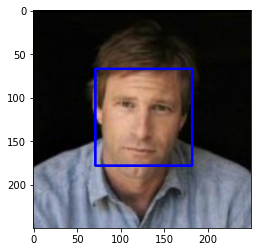

In [29]:
import cv2                
import matplotlib.pyplot as plt  
%matplotlib inline                           
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# find faces in image
# Detect faces in the image
faces = face_cascade.detectMultiScale(
    gray,scaleFactor=1.2,minNeighbors=5,minSize=(30, 30)
)
# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [30]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

- test the performance of the `face_detector` function.  
- finding at What percentage of the first 100 images in `human_files` have detected human face  
- finding at What percentage of the first 100 images in `dog_files` have detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance. We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

In [31]:

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

face_dec = np.vectorize(face_detector)
 
human_face_detected =face_dec(human_files_short)
dog_detected = face_dec(dog_files_short)

print(" Human Face Detected with {:.1f}% accuracy".format(sum(human_face_detected)))
print("Dog detected with  {:.1f}% error".format(sum(dog_detected)))

 Human Face Detected with 96.0% accuracy
Dog detected with  4.0% error


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [32]:
#pip install torch

Note: you may need to restart the kernel to use updated packages.


In [34]:
#pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [35]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\kousa/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [36]:
use_cuda = torch.cuda.is_available()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

the below cell will write a function that accepts a path to an image (such as `'dog/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [51]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
VGG16.eval()
def transfrom(image_path):
    img =Image.open(image_path) 
    
def VGG16_predict(img_path):
      transform_img = transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        
    ])
    img = Image.open(img_path)
    img = transform_img(img)
    
    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    img = Variable(img)
    
    prediction = VGG16(img.cpu())  # Returns a Tensor of shape (batch, num class labels)
    prediction = prediction.cpu().data.numpy().argmax()# Our prediction will be the index of the class label with largest value.    
    return prediction # predicted class index

In [46]:
from PIL import Image
import glob
image = Image.open(human_files[4])
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)


JPEG
RGB
(250, 250)


uint8
(250, 250, 3)


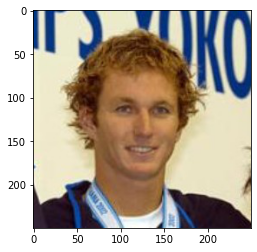

In [48]:

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(human_files[4])
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [52]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
       pred=VGG16_predict(img_path)
    if pred >= 151 and pred <= 268:
        return True
    else:
        return False
    
    #return None # true/false

In [53]:
print(dog_detector(dog_files[0]))

True


In [54]:
print(dog_detector(human_files[0]))

False


### (IMPLEMENTATION) Assess the Dog Detector

- testing the performance of your `dog_detector` function.  
- finding at What percentage of the images in `human_files_short` have a detected dog  
- Finding at percentage of the images in `dog_files_short` have a detected dog

In [55]:
from tqdm import tqdm
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

counter_human = 0
counter_dog   = 0
# percentage of the images in human_files_short have a detected dog
for human_file in tqdm(human_files_short):
    if(dog_detector(human_file)):
        counter_human +=1
#percentage of the images in dog_files_short have a detected dog
for dog_file in tqdm(dog_files_short):
    if(dog_detector(dog_file)):
        counter_dog +=1
print("Detected dogs in human files ",counter_human,"%")
print("Detected dogs in dogs files ",counter_dog,"%")


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.88it/s]

Detected dogs in human files  0 %
Detected dogs in dogs files  100 %


# We suggest VGG-16 as a potential network to detect dog images in your algorithm
---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)



### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset


In [57]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
data_dir = "dogImages/"
num_workers = 0
batch_size = 10
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # no need of image augmentation for the validation test set    
    'valid' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # test dataset flips can  be found out in fast.ai
    'test' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}


train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test'])
}

# Loading Dataset
loaders_scratch = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}




In [58]:
print(loaders_scratch['train'])

1. The code resizes the image to an image of 256 x 256, then it center crops imag to a size of 224 X 224, the image is then normalized as this the requirement for f
2. Here we have used image augmentation then randomly flipped the image horizontally then randomly rotated the image by 15 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed. 

In [59]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        ## Follow the architecture of VGG-16
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        
        self.fc1 = nn.Linear(256 * 6 * 6, 133)
        self.max_pool = nn.MaxPool2d(2, 2,ceil_mode=True)
        
        self.dropout = nn.Dropout(0.20)
        
        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn6(x)

        x = x.view(-1, 256 * 6 * 6)

        x = self.dropout(x)
        x = self.fc1(x)
        return x
model_scratch = Net()
if use_cuda:
    model_scratch.cuda()


In [60]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=133, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6): BatchNorm2d(

### (IMPLEMENTATION) Specify Loss Function and Optimizer

specifying a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` 

In [61]:
import torch.optim as optim


criterion_scratch = nn.CrossEntropyLoss()


optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate the model in the code cell below. 

In [63]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # Optimization
            optimizer.step()
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
          
            output = model(data)
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
                
            # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
      
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
            
    # return trained model
    return model


# train the model
model_scratch = train(2, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000722 	Validation Loss: 0.005634
Validation loss decreased (inf --> 0.005634).  Saving model ...
Epoch: 2 	Training Loss: 0.000705 	Validation Loss: 0.005396
Validation loss decreased (0.005634 --> 0.005396).  Saving model ...


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Trying out the model on the test dataset of dog images. calculating and printing the test loss and accuracy.  Ensuring that our test accuracy is greater than 10%.

In [64]:
def test(loaders, model, criterion, use_cuda):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.332095


Test Accuracy:  7% (64/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

using transfer learning to create a CNN that can identify dog breed from images.  The CNN Should attain at least 60% accuracy on the test set.



In [66]:

from torchvision import datasets
import torchvision.transforms as transforms

data_dir = "dogImages/"
num_workers = 0
batch_size = 10
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # no need of image augmentation for the validation test set    
    'valid' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # test dataset flips can  be found out in fast.ai
    'test' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}


train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test'])
}
class_names = image_datasets['train'].classes
# Loading Dataset
loaders_transfer= {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}




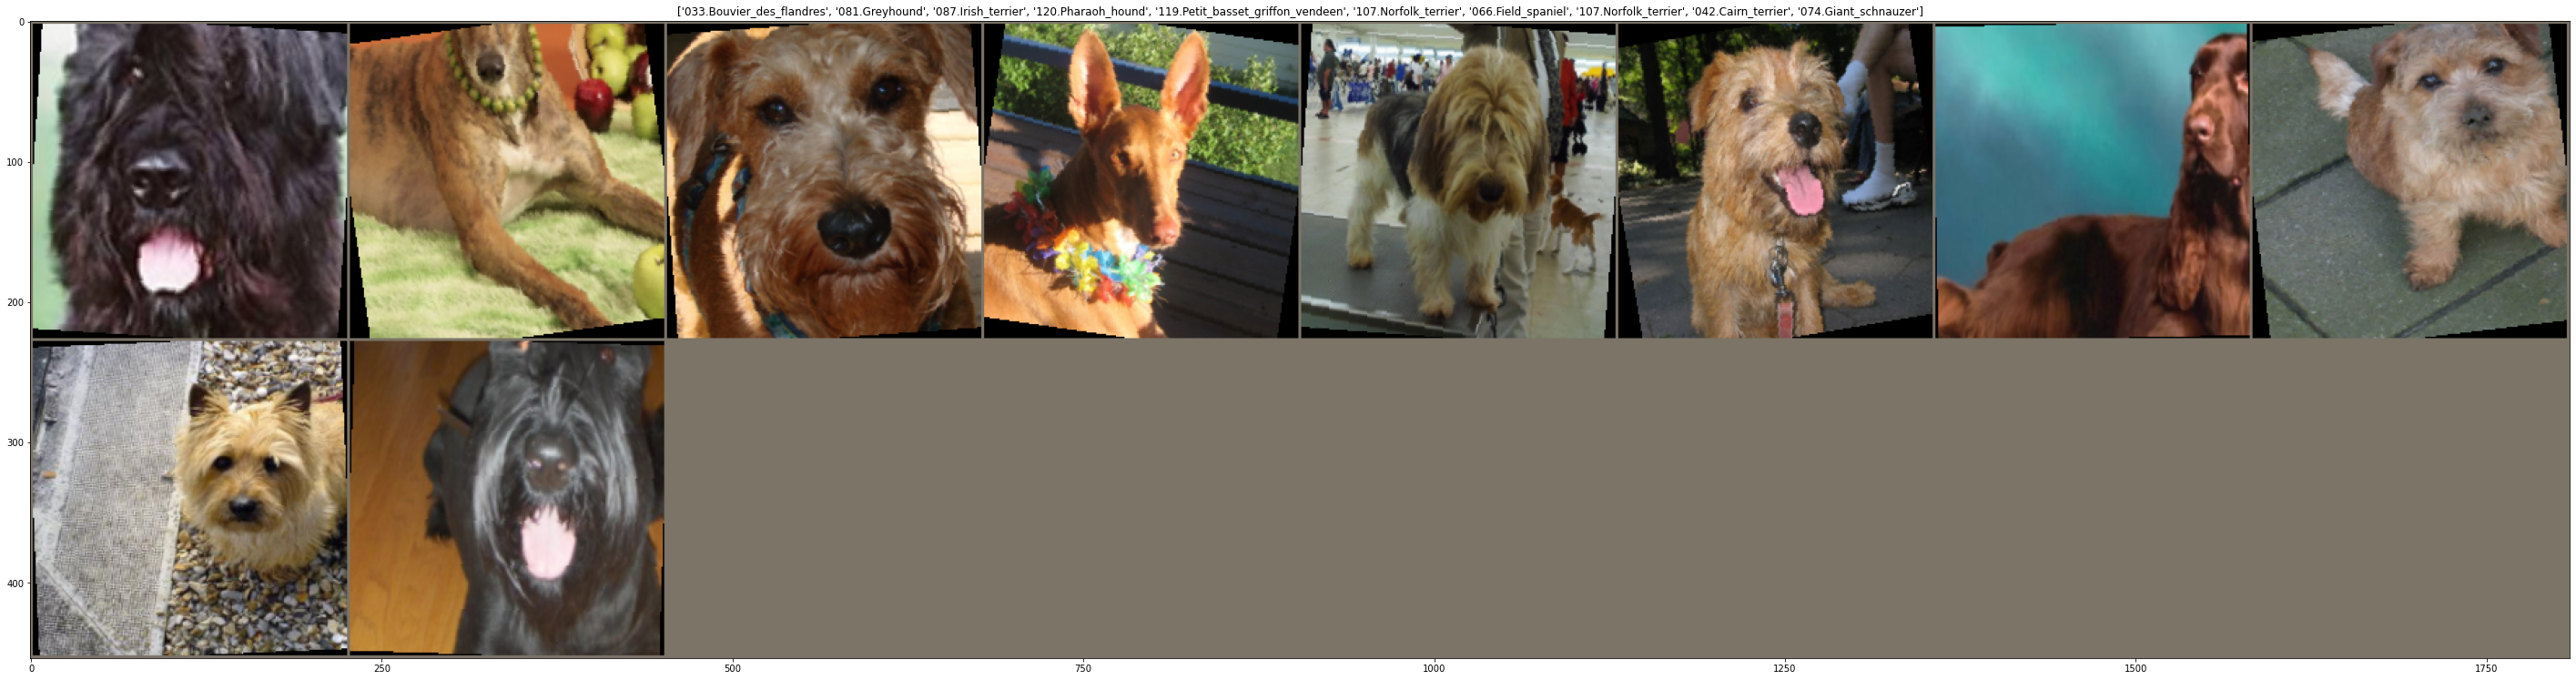

In [67]:
import torchvision.utils as torchutil
import matplotlib.pyplot as plt
plt.ion()
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig = plt.figure(figsize=(50, 25))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
# Get a batch of training data
inputs, classes = next(iter(loaders_transfer['train']))
# Make a grid from batch
out = torchutil.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed. 

In [68]:
import torchvision.models as models
import torch.nn as nn

model_transfer = models.vgg16(pretrained=True)
# Freeze the pre-trained weights
for param in model_transfer.features.parameters():
    param.required_grad = False
    
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features

# Create a new layer(n_inputs -> 133)
# The new layer's requires_grad will be automatically True.
last_layer = nn.Linear(n_inputs, 133)

# Change the last layer to the new layer.
model_transfer.classifier[6] = last_layer

# Print the model.
print(model_transfer)



if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model



In [71]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# train the model
n_epochs = 2


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # Optimization
            optimizer.step()
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
          
            output = model(data)
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
                
            # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
            
    # return trained model
    return model


model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000269 	Validation Loss: 0.001018
Validation loss decreased (inf --> 0.001018).  Saving model ...
Epoch: 2 	Training Loss: 0.000236 	Validation Loss: 0.000861
Validation loss decreased (0.001018 --> 0.000861).  Saving model ...


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

testing the dataset of dog images.Calculate and print the test loss and accuracy. 

In [72]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.772184


Test Accuracy: 78% (655/836)


### the accuracy of the model is predicted as 78%

### (IMPLEMENTATION) Predict Dog Breed with the Model

The Below function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [76]:
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    image = image.cpu()
    
    
    model_transfer.eval()
    idx = torch.argmax(model_transfer(image))
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.




In [77]:
from PIL import Image
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path)
        print("A dog has been detected which most likely to be {0} breed".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(img_path)
        print("This is a Human who looks like a {0}".format(prediction))
    else:
        print("Neither Human nor Dog")


---
<a id='step6'></a>
## Step 6: Testing the output of the Algorithm


### (IMPLEMENTATION) Testing the Algorithm on Sample Images!
  



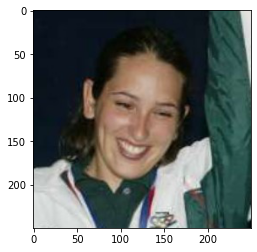

This is a Human who looks like a Clumber spaniel


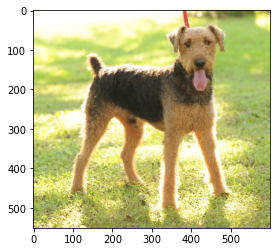

A dog has been detected which most likely to be Airedale terrier breed


In [83]:
for file in np.hstack((human_files[89], dog_files[145])):
    run_app(file)